# Segmenting and Clustering Neighborhoods in Toronto

This is the week 3, Peer-graded Assignment for Applied Data Science Capstone in
Coursera.

## One notebook was used for all three parts of the assignment and a markdown clearly label each part. 

# Part 1

## Table of Contents


1.  Scraping the list of postal codes in Canada from the Wikipedia -https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,<br>

2.  Creating a dataframe <br>

3.  Data cleaning: Remove empty cells with "Not assigned" <br>

4.  Using the .shape method to print the number of rows of the dataframe. <br>

#### Step 1 - Scraping the data from Wikipedia

In [1]:
#importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

Using requests library to download the webpage from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, and Saving it in the variable named 'data'.

In [2]:
#Scraping the List of postal codes of Canada
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data=requests.get(url).text

In [3]:
#constructs a BeautifulSoup object from data and stores this as soup
soup = BeautifulSoup(data, 'xml')

In [4]:
#finf the table to store in the variable table
table=soup.find('table')

#### Step 2 - Creating a dataframe

In [5]:
# naming the three columns: PostalCode, Borough, and Neighbourhood 
column_names = ['PostalCode','Borough','Neighbourhood']
#We extract just these three columns: PostalCode, Borough, and Neighborhood from the dataframe
column_names = ['PostalCode','Borough','Neighbourhood']
#creating a DataFrame with the columns 
df = pd.DataFrame(columns = column_names)

In [6]:
# for loop to iterate over tr_cell to get  all the postcode, borough, neighborhood 
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data
        
df.head(10)

PostalCode           Borough                                Neighbourhood
0        M1A      Not assigned                                 Not assigned
1        M2A      Not assigned                                 Not assigned
2        M3A        North York                                    Parkwoods
3        M4A        North York                             Victoria Village
4        M5A  Downtown Toronto                    Regent Park, Harbourfront
5        M6A        North York             Lawrence Manor, Lawrence Heights
6        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government
7        M8A      Not assigned                                 Not assigned
8        M9A         Etobicoke      Islington Avenue, Humber Valley Village
9        M1B       Scarborough                               Malvern, Rouge

#### Step 3:  Data cleaning: Remove empty cells with "Not assigned"

In [7]:
df=df[df['Borough']!='Not assigned']

In [8]:
df[df['Neighbourhood']!='Not assigned']
df.head()

PostalCode           Borough                                Neighbourhood
2        M3A        North York                                    Parkwoods
3        M4A        North York                             Victoria Village
4        M5A  Downtown Toronto                    Regent Park, Harbourfront
5        M6A        North York             Lawrence Manor, Lawrence Heights
6        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

#### Step 4: Using the .shape method to print the number of rows of the dataframe

In [9]:
df.shape

(103, 3)

In [10]:
df.dtypes

PostalCode       object
Borough          object
Neighbourhood    object
dtype: object

# End of Part 1

# Part 2

## Table of Contents
1. Get the CSV file  that has the geographical coordinates of each postal code<br>
2. Merge the data scraped in part 1 to the geographical coordinates data using the postal code as a point of merge

#### Step 1- Getting the data with geographical coordinates into a dataframe

In [11]:
# Getting the geographical coordinates of Toronto boroughs from a csv file 
geo_data = pd.read_csv('https://cocl.us/Geospatial_data')
#geo_data.columns=['Postalcode','Latitude','Longitude']
geo_data.head(10)

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476
5         M1J  43.744734 -79.239476
6         M1K  43.727929 -79.262029
7         M1L  43.711112 -79.284577
8         M1M  43.716316 -79.239476
9         M1N  43.692657 -79.264848

In [12]:
#getting the data type
geo_data.dtypes

Postal Code     object
Latitude       float64
Longitude      float64
dtype: object

In [13]:
#getting the shape
geo_data.shape

(103, 3)

creating a function

In [14]:
def get_coordinate(postal_code):
    # initialising  variable to None
    coords = None
    while(coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        coords = g.latlng
    latitude = coords[0]
    longitude = coords[1]
    return latitude,longitude

#### Step 2- Merge the dataset from part 1 to the geographical coordinates dataset

In [15]:
geo_data.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
toro_geo_data  = pd.merge(geo_data,df, on="PostalCode")
toro_geo_data.head()

PostalCode   Latitude  Longitude      Borough  \
0        M1B  43.806686 -79.194353  Scarborough   
1        M1C  43.784535 -79.160497  Scarborough   
2        M1E  43.763573 -79.188711  Scarborough   
3        M1G  43.770992 -79.216917  Scarborough   
4        M1H  43.773136 -79.239476  Scarborough   

                            Neighbourhood  
0                          Malvern, Rouge  
1  Rouge Hill, Port Union, Highland Creek  
2       Guildwood, Morningside, West Hill  
3                                  Woburn  
4                               Cedarbrae

In [16]:
toro_data=toro_geo_data[['PostalCode','Borough','Neighbourhood','Latitude','Longitude']]
toro_data.head()

PostalCode      Borough                           Neighbourhood   Latitude  \
0        M1B  Scarborough                          Malvern, Rouge  43.806686   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [17]:
toro_data.shape

(103, 5)

# End of Part 2

# Part 3 Exploring, Segmenting and Clustering the neighborhoods in Toronto.


## Table of Contents
1. Import the necessary Libraries needed for parts 3.<br>
2. Define Foursquare Credentials and Version. <br>
3. Working with only one boroughs that contain the word Toronto.<br>
4. Clustering the Neighborhoods.<br>
5. Examining the Segmentation.<br>

#### Step 1- Import the necessary Libraries needed for parts 3.

In [18]:
# uncomment this line if you have the module named 'folium' and 'geopy'
#!conda install -c conda-forge folium=0.5.0 --yes 
#!pip install geopy

In [19]:
#importing libraries
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
# map rendering library
import folium 
import numpy as np
from pandas.io.json import json_normalize 
#use to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
print('Libraries imported.')

Libraries imported.


#### Step 2-  Define Foursquare Credentials and Version.

#### The CLIENT_ID  and CLIENT_SECRET numbers has been taken off because of privacy 

In [20]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#### Step 3 -Working with only one boroughs that contain the word Toronto 

In [21]:
#getting the Borough that will be used
df_toro=toro_data[toro_data['Borough'].str.contains("Toronto")]
df_toro.head()

PostalCode          Borough                   Neighbourhood   Latitude  \
37        M4E     East Toronto                     The Beaches  43.676357   
41        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
42        M4L     East Toronto  India Bazaar, The Beaches West  43.668999   
43        M4M     East Toronto                 Studio District  43.659526   
44        M4N  Central Toronto                   Lawrence Park  43.728020   

    Longitude  
37 -79.293031  
41 -79.352188  
42 -79.315572  
43 -79.340923  
44 -79.388790

##### creating a function that will localise available vanues in toronto 

In [22]:
#locate available vanues in toronto 
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Using the getNearbyVenues function created above to get the nearby Venues

In [23]:
toro_venues = getNearbyVenues(names=df_toro['Neighbourhood'],
                                   latitudes=df_toro['Latitude'],
                                   longitudes=df_toro['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [24]:
#examine the data
toro_venues.head()

Neighbourhood  Neighbourhood Latitude  \
0                   The Beaches               43.676357   
1                   The Beaches               43.676357   
2                   The Beaches               43.676357   
3                   The Beaches               43.676357   
4  The Danforth West, Riverdale               43.679557   

   Neighbourhood Longitude                               Venue  \
0               -79.293031                   Glen Manor Ravine   
1               -79.293031  The Big Carrot Natural Food Market   
2               -79.293031                 Grover Pub and Grub   
3               -79.293031                       Upper Beaches   
4               -79.352188                       MenEssentials   

   Venue Latitude  Venue Longitude     Venue Category  
0       43.676821       -79.293942              Trail  
1       43.678879       -79.297734  Health Food Store  
2       43.679181       -79.297215                Pub  
3       43.680563       -79.292869       Neighborhood  
4       43.677820       -79.351265     Cosmetics Shop

In [25]:
#grouping by the Neighbourhood count
toro_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  \
Neighbourhood                                                                
Berczy Park                                                             58   
Brockton, Parkdale Village, Exhibition Place                            22   
Business reply mail Processing Centre, South Ce...                      18   
CN Tower, King and Spadina, Railway Lands, Harb...                      16   
Central Bay Street                                                      59   
Christie                                                                15   
Church and Wellesley                                                    77   
Commerce Court, Victoria Hotel                                         100   
Davisville                                                              35   
Davisville North                                                         8   
Dufferin, Dovercourt Village                                            16   
First Canadian Place, Underground city                                 100   
Forest Hill North & West, Forest Hill Road Park                          4   
Garden District, Ryerson                                               100   
Harbourfront East, Union Station, Toronto Islands                      100   
High Park, The Junction South                                           24   
India Bazaar, The Beaches West                                          21   
Kensington Market, Chinatown, Grange Park                               64   
Lawrence Park                                                            4   
Little Portugal, Trinity                                                42   
North Toronto West,  Lawrence Park                                      17   
Parkdale, Roncesvalles                                                  14   
Queen's Park, Ontario Provincial Government                             29   
Regent Park, Harbourfront                                               46   
Richmond, Adelaide, King                                                95   
Rosedale                                                                 4   
Roselawn                                                                 2   
Runnymede, Swansea                                                      36   
St. James Town                                                          78   
St. James Town, Cabbagetown                                             46   
Stn A PO Boxes                                                          99   
Studio District                                                         37   
Summerhill West, Rathnelly, South Hill, Forest ...                      15   
The Annex, North Midtown, Yorkville                                     21   
The Beaches                                                              4   
The Danforth West, Riverdale                                            43   
Toronto Dominion Centre, Design Exchange                               100   
University of Toronto, Harbord                                          31   

                                                    Neighbourhood Longitude  \
Neighbourhood                                                                 
Berczy Park                                                              58   
Brockton, Parkdale Village, Exhibition Place                             22   
Business reply mail Processing Centre, South Ce...                       18   
CN Tower, King and Spadina, Railway Lands, Harb...                       16   
Central Bay Street                                                       59   
Christie                                                                 15   
Church and Wellesley                                                     77   
Commerce Court, Victoria Hotel                                          100   
Davisville                                                               35   
Davisville North                                              

In [26]:
#cheack the first 5 data and the shape
print(toro_venues.shape)
toro_venues.head()

(1600, 7)


Neighbourhood  Neighbourhood Latitude  \
0                   The Beaches               43.676357   
1                   The Beaches               43.676357   
2                   The Beaches               43.676357   
3                   The Beaches               43.676357   
4  The Danforth West, Riverdale               43.679557   

   Neighbourhood Longitude                               Venue  \
0               -79.293031                   Glen Manor Ravine   
1               -79.293031  The Big Carrot Natural Food Market   
2               -79.293031                 Grover Pub and Grub   
3               -79.293031                       Upper Beaches   
4               -79.352188                       MenEssentials   

   Venue Latitude  Venue Longitude     Venue Category  
0       43.676821       -79.293942              Trail  
1       43.678879       -79.297734  Health Food Store  
2       43.679181       -79.297215                Pub  
3       43.680563       -79.292869       Neighborhood  
4       43.677820       -79.351265     Cosmetics Shop

In [27]:
#print out the uniques categories.
print('There are {} uniques categories.'.format(len(toro_venues['Venue Category'].unique())))

There are 236 uniques categories.


In [28]:
# Analyse each neighborhood
# one hot encoding
toro_onehot = pd.get_dummies(toro_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toro_onehot['Neighbourhood'] = toro_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toro_onehot.columns[-1]] + list(toro_onehot.columns[:-1])
toro_onehot = toro_onehot[fixed_columns]

toro_onehot.head()

Neighbourhood  Airport  Airport Food Court  Airport Gate  \
0                   The Beaches        0                   0             0   
1                   The Beaches        0                   0             0   
2                   The Beaches        0                   0             0   
3                   The Beaches        0                   0             0   
4  The Danforth West, Riverdale        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  ...  Tibetan Restaurant  Toy / Game Store  Trail  \
0             0         0  ...                   0                 0      1   
1             0         0  ...                   0                 0      0   
2             0         0  ...                   0                 0      0   
3             0         0  ...                   0                 0      0   
4             0         0  ...                   0                 0      0   

   Train Station  Vegetarian / Vegan Restaurant  Video Game Store  \
0              0                              0                 0   
1              0                              0                 0   
2              0                              0                 0   
3              0                              0                 0   
4              0                              0                 0   

   Vietnamese Restaurant  Wine Bar  Wine Shop  Yoga Studio  
0                      0         0          0            0  
1                      0         0          0            0  
2                      0         0          0            0  
3                      0         0          0            0  
4                      0         0          0            0  

[5 rows x 237 columns]

In [29]:
#check the shape
toro_onehot.shape

(1600, 237)

In [30]:
#grouping the rows by neighbourhood and by taking the mean of the frequency of occurrence of each category
toro_grouped = toro_onehot.groupby('Neighbourhood').mean().reset_index()
toro_grouped

Neighbourhood  Airport  \
0                                         Berczy Park   0.0000   
1        Brockton, Parkdale Village, Exhibition Place   0.0000   
2   Business reply mail Processing Centre, South C...   0.0000   
3   CN Tower, King and Spadina, Railway Lands, Har...   0.0625   
4                                  Central Bay Street   0.0000   
5                                            Christie   0.0000   
6                                Church and Wellesley   0.0000   
7                      Commerce Court, Victoria Hotel   0.0000   
8                                          Davisville   0.0000   
9                                    Davisville North   0.0000   
10                       Dufferin, Dovercourt Village   0.0000   
11             First Canadian Place, Underground city   0.0000   
12    Forest Hill North & West, Forest Hill Road Park   0.0000   
13                           Garden District, Ryerson   0.0000   
14  Harbourfront East, Union Station, Toronto Islands   0.0000   
15                      High Park, The Junction South   0.0000   
16                     India Bazaar, The Beaches West   0.0000   
17          Kensington Market, Chinatown, Grange Park   0.0000   
18                                      Lawrence Park   0.0000   
19                           Little Portugal, Trinity   0.0000   
20                 North Toronto West,  Lawrence Park   0.0000   
21                             Parkdale, Roncesvalles   0.0000   
22        Queen's Park, Ontario Provincial Government   0.0000   
23                          Regent Park, Harbourfront   0.0000   
24                           Richmond, Adelaide, King   0.0000   
25                                           Rosedale   0.0000   
26                                           Roselawn   0.0000   
27                                 Runnymede, Swansea   0.0000   
28                                     St. James Town   0.0000   
29                        St. James Town, Cabbagetown   0.0000   
30                                     Stn A PO Boxes   0.0000   
31                                    Studio District   0.0000   
32  Summerhill West, Rathnelly, South Hill, Forest...   0.0000   
33                The Annex, North Midtown, Yorkville   0.0000   
34                                        The Beaches   0.0000   
35                       The Danforth West, Riverdale   0.0000   
36           Toronto Dominion Centre, Design Exchange   0.0000   
37                     University of Toronto, Harbord   0.0000   

    Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0               0.0000        0.0000           0.000            0.000   
1               0.0000        0.0000           0.000            0.000   
2               0.0000        0.0000           0.000            0.000   
3               0.0625        0.0625           0.125            0.125   
4               0.0000        0.0000           0.000            0.000   
5               0.0000        0.0000           0.000            0.000   
6               0.0000        0.0000           0.000            0.000   
7               0.0000        0.0000           0.000            0.000   
8               0.0000        0.0000           0.000            0.000   
9               0.0000        0.0000           0.000            0.000   
10              0.0000        0.0000           0.000            0.000   
11              0.0000        0.0000           0.000            0.000   
12              0.0000        0.0000           0.000            0.000   
13              0.0000        0.0000           0.000            0.000   
14              0.0000        0.0000           0.000            0.000   
15              0.0000        0.0000           0.000            0.000   
16              0.0000        0.0000           0.000            0.000   
17              0.0000        0.0000           0.000            0.000   
18              0.0000        0.0000           0.000            0.000   
19   

In [31]:
#check the shape after the grouping
toro_grouped.shape

(38, 237)

In [32]:
#print each neighbourhood along with the top 10 most common venues
num_top_venues = 10

for hood in toro_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toro_grouped[toro_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2              Bakery  0.05
3         Cheese Shop  0.03
4      Farmers Market  0.03
5          Restaurant  0.03
6            Beer Bar  0.03
7            Pharmacy  0.03
8  Seafood Restaurant  0.03
9   French Restaurant  0.02


----Brockton, Parkdale Village, Exhibition Place----
                    venue  freq
0                    Café  0.14
1          Breakfast Spot  0.09
2             Coffee Shop  0.09
3      Italian Restaurant  0.05
4                 Stadium  0.05
5  Furniture / Home Store  0.05
6               Nightclub  0.05
7            Climbing Gym  0.05
8                     Bar  0.05
9                  Bakery  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0    Light Rail Station  0.11
1            Comic Shop  0.06
2         Garden Center  0.06
3                  Park  0.06
4      Recording Stu

##### Creating a function to sort the venues in descending order

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Creating a new dataframe to display the top 10 venues for each neighborhood

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toro_grouped['Neighbourhood']

for ind in np.arange(toro_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toro_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head(10)

Neighbourhood 1st Most Common Venue  \
0                                        Berczy Park           Coffee Shop   
1       Brockton, Parkdale Village, Exhibition Place                  Café   
2  Business reply mail Processing Centre, South C...    Light Rail Station   
3  CN Tower, King and Spadina, Railway Lands, Har...        Airport Lounge   
4                                 Central Bay Street           Coffee Shop   
5                                           Christie         Grocery Store   
6                               Church and Wellesley           Coffee Shop   
7                     Commerce Court, Victoria Hotel           Coffee Shop   
8                                         Davisville           Pizza Place   
9                                   Davisville North                 Hotel   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Cocktail Bar                Bakery              Beer Bar   
1        Breakfast Spot           Coffee Shop     Convenience Store   
2  Gym / Fitness Center                   Spa         Garden Center   
3       Airport Service      Airport Terminal               Airport   
4        Sandwich Place                  Café    Italian Restaurant   
5                  Café                  Park             Nightclub   
6      Sushi Restaurant   Japanese Restaurant            Restaurant   
7            Restaurant                  Café                 Hotel   
8        Sandwich Place          Dessert Shop      Sushi Restaurant   
9  Gym / Fitness Center        Sandwich Place                  Park   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0          Farmers Market    Seafood Restaurant              Pharmacy   
1  Furniture / Home Store         Burrito Place            Restaurant   
2                  Garden  Fast Food Restaurant        Farmers Market   
3                     Bar                 Plane   Rental Car Location   
4         Thai Restaurant           Salad Place       Bubble Tea Shop   
5      Italian Restaurant           Candy Store            Restaurant   
6                 Gay Bar           Yoga Studio                 Hotel   
7      Italian Restaurant                   Gym   American Restaurant   
8                     Gym    Italian Restaurant           Coffee Shop   
9          Breakfast Spot      Department Store     Food & Drink Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Cheese Shop            Restaurant              Juice Bar  
1               Stadium    Italian Restaurant           Intersection  
2            Comic Shop                  Park       Recording Studio  
3      Sculpture Garden         Boat or Ferry               Boutique  
4          Burger Joint             Juice Bar      Korean Restaurant  
5            Baby Store           Coffee Shop               Creperie  
6  Fast Food Restaurant          Burger Joint                    Pub  
7    Seafood Restaurant         Deli / Bodega    Japanese Restaurant  
8                  Café               Brewery         Discount Store  
9            Donut Shop               Dog Run       Doner Restaurant

### Step 4  Clustering Neighborhoods

In [35]:
# set number of clusters
kclusters = 5

toro_grouped_clustering = toro_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toro_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toro_merged = df_toro

# merge toro_grouped with df_toro to add latitude/longitude for each neighborhood
toro_merged = toro_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toro_merged.head()

PostalCode          Borough                   Neighbourhood   Latitude  \
37        M4E     East Toronto                     The Beaches  43.676357   
41        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
42        M4L     East Toronto  India Bazaar, The Beaches West  43.668999   
43        M4M     East Toronto                 Studio District  43.659526   
44        M4N  Central Toronto                   Lawrence Park  43.728020   

    Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
37 -79.293031             3.0          Neighborhood     Health Food Store   
41 -79.352188             0.0      Greek Restaurant           Coffee Shop   
42 -79.315572             0.0                  Park        Sandwich Place   
43 -79.340923             0.0           Coffee Shop   American Restaurant   
44 -79.388790             4.0                  Park              Bus Line   

   3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
37                 Trail                     Pub      Doner Restaurant   
41    Italian Restaurant  Furniture / Home Store        Ice Cream Shop   
42  Fast Food Restaurant               Pet Store                   Pub   
43                Bakery                 Brewery                  Café   
44           Swim School        Business Service           Yoga Studio   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37                 Diner        Discount Store   Distribution Center   
41           Yoga Studio       Bubble Tea Shop                   Spa   
42            Board Shop    Italian Restaurant     Fish & Chips Shop   
43             Gastropub           Yoga Studio           Fish Market   
44        Discount Store           Event Space  Ethiopian Restaurant   

   9th Most Common Venue 10th Most Common Venue  
37               Dog Run    Dumpling Restaurant  
41   Japanese Restaurant              Juice Bar  
42            Steakhouse             Restaurant  
43                  Park           Neighborhood  
44           Escape Room      Electronics Store

In [37]:
#checking the shape
toro_merged.shape

(39, 16)

##### Getting the coordinate of Toronto

In [38]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


#### creating a map of Toronto using the latitude and longitude values collected

## I had to insert the images because it wasn't show on Github

In [40]:
from IPython.display import Image# the library for the image

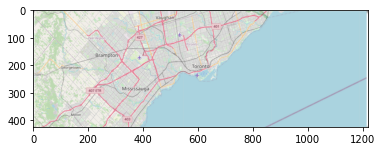

In [60]:
#using matplotlib to show the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("Toronto.png")
plt.imshow(image)
plt.show()

In [61]:
to_map = folium.Map(location=[latitude, longitude], zoom_start=10)
to_map

In [62]:
#### The map with the Clusters 

In [63]:
to_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, borough, neighborhood in zip(
        toro_data['Latitude'], 
        toro_data['Longitude'], 
        toro_data['Borough'], 
        toro_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(to_map)  

to_map

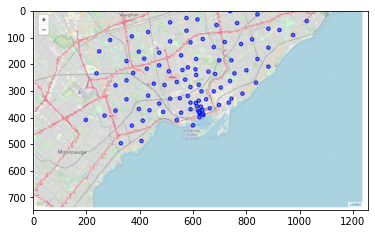

In [64]:
image2 = mpimg.imread("clusters.png")
plt.imshow(image2)
plt.show()

### Step 5- Examining the 5 clusters

##### The first cluster

In [65]:
toro_merged.loc[toro_merged['Cluster Labels'] == 0, toro_merged.columns[[1] + list(range(5, toro_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
41      East Toronto             0.0      Greek Restaurant   
42      East Toronto             0.0                  Park   
43      East Toronto             0.0           Coffee Shop   
45   Central Toronto             0.0                 Hotel   
46   Central Toronto             0.0        Clothing Store   
47   Central Toronto             0.0           Pizza Place   
49   Central Toronto             0.0           Coffee Shop   
51  Downtown Toronto             0.0           Coffee Shop   
52  Downtown Toronto             0.0           Coffee Shop   
53  Downtown Toronto             0.0           Coffee Shop   
54  Downtown Toronto             0.0        Clothing Store   
55  Downtown Toronto             0.0           Coffee Shop   
56  Downtown Toronto             0.0           Coffee Shop   
57  Downtown Toronto             0.0           Coffee Shop   
58  Downtown Toronto             0.0           Coffee Shop   
59  Downtown Toronto             0.0           Coffee Shop   
60  Downtown Toronto             0.0           Coffee Shop   
61  Downtown Toronto             0.0           Coffee Shop   
65   Central Toronto             0.0                  Café   
66  Downtown Toronto             0.0                  Café   
67  Downtown Toronto             0.0                  Café   
68  Downtown Toronto             0.0        Airport Lounge   
69  Downtown Toronto             0.0           Coffee Shop   
70  Downtown Toronto             0.0           Coffee Shop   
75  Downtown Toronto             0.0         Grocery Store   
76      West Toronto             0.0              Pharmacy   
77      West Toronto             0.0                   Bar   
78      West Toronto             0.0                  Café   
82      West Toronto             0.0                  Café   
83      West Toronto             0.0        Breakfast Spot   
84      West Toronto             0.0                  Café   
85  Downtown Toronto             0.0           Coffee Shop   
87      East Toronto             0.0    Light Rail Station   

   2nd Most Common Venue          3rd Most Common Venue  \
41           Coffee Shop             Italian Restaurant   
42        Sandwich Place           Fast Food Restaurant   
43   American Restaurant                         Bakery   
45  Gym / Fitness Center                 Sandwich Place   
46           Coffee Shop                    Yoga Studio   
47        Sandwich Place                   Dessert Shop   
49            Bagel Shop            Fried Chicken Joint   
51            Restaurant                           Café   
52      Sushi Restaurant            Japanese Restaurant   
53                Bakery                           Park   
54           Coffee Shop      Middle Eastern Restaurant   
55                  Café                      Gastropub   
56          Cocktail Bar                         Bakery   
57        Sandwich Place                           Café   
58                  Café                     Restaurant   
59              Aquarium                           Café   
60                 Hotel                           Café   
61            Restaurant                           Café   
65        Sandwich Place                    Coffee Shop   
66             Bookstore                            Bar   
67           Coffee Shop             Mexican Restaurant   
68       Airport Service               Airport Terminal   
69    Seafood Restaurant                   Cocktail Bar   
70                  Café                          Hotel   
75                  Café                           Park   
76                Bakery                    Supermarket   
77                  Café  Vegetarian / Vegan Restaurant   
78        Breakfast Spot                    Coffee Shop   
82    Mexican Restaurant                Thai Restaurant   
83             Gift Shop               Cuban Restaurant   
84           Coffee Shop                            Pub   
85              

##### The secord cluster

In [66]:

toro_merged.loc[toro_merged['Cluster Labels'] == 1, toro_merged.columns[[1] + list(range(5, toro_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
63  Central Toronto             1.0          Home Service   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
63                Garden           Yoga Studio          Dessert Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
63           Event Space  Ethiopian Restaurant           Escape Room   

   8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
63     Electronics Store  Eastern European Restaurant    Dumpling Restaurant

##### The third cluster

In [67]:
toro_merged.loc[toro_merged['Cluster Labels'] == 2, toro_merged.columns[[1] + list(range(5, toro_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
50  Downtown Toronto             2.0                  Park   
64   Central Toronto             2.0                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
50            Playground                 Trail           Yoga Studio   
64      Sushi Restaurant                 Trail         Jewelry Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
50          Dessert Shop  Ethiopian Restaurant           Escape Room   
64           Yoga Studio   Dumpling Restaurant   Distribution Center   

   8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
50     Electronics Store  Eastern European Restaurant    Dumpling Restaurant  
64               Dog Run             Doner Restaurant             Donut Shop

##### The fourth cluster

In [68]:
toro_merged.loc[toro_merged['Cluster Labels'] == 3, toro_merged.columns[[1] + list(range(5, toro_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
37  East Toronto             3.0          Neighborhood     Health Food Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
37                 Trail                   Pub      Doner Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37                 Diner        Discount Store   Distribution Center   

   9th Most Common Venue 10th Most Common Venue  
37               Dog Run    Dumpling Restaurant

##### The fifth cluster

In [69]:
toro_merged.loc[toro_merged['Cluster Labels'] == 4, toro_merged.columns[[1] + list(range(5, toro_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
44  Central Toronto             4.0                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
44              Bus Line           Swim School      Business Service   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
44           Yoga Studio        Discount Store           Event Space   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
44  Ethiopian Restaurant           Escape Room      Electronics Store

The first cluster seems to have almost all the venues, this can been seen through the map

# The End of part 3, Thanks